<a href="https://colab.research.google.com/github/agamthind96/Data-Analysis/blob/main/Playing_with_pandas_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gapminder_full.csv") # Gapminder Data
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(1704, 6)

- The shape attribue returns a tuple in ehich the first value is the number of rows and the second value is the number of columns.
- Shape is an attribute bot a function or method.

In [5]:
df.columns

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

### Question : What is the type of the column names ?



In [6]:
print(df.dtypes)

country        object
year            int64
population      int64
continent      object
life_exp      float64
gdp_cap       float64
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## Subsetting Columns

### Subsetting Colmumns by Name


In [8]:
country_df = df["country"]
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [9]:
subset = df[['country','continent','year']]
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


## Subsetting Rows

### Subsetting Rows by Index Label (loc)

In [10]:
# Get the first row of the data
df.loc[0]

country       Afghanistan
year                 1952
population        8425333
continent            Asia
life_exp           28.801
gdp_cap        779.445314
Name: 0, dtype: object

- Get the last row of the DataFrame

- df.loc[-1]

The above command throws an error because **loc** is actually looking for row index label.


In [11]:
number_of_rows = df.shape[0]
last_row_index = number_of_rows - 1

df.loc[last_row_index]

country         Zimbabwe
year                2007
population      12311143
continent         Africa
life_exp          43.487
gdp_cap       469.709298
Name: 1703, dtype: object

### Subsetting multiple rows


In [12]:
df.loc[[0,99,999]]

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
99,Bangladesh,1967,62821884,Asia,43.453,721.186086
999,Mongolia,1967,1149500,Asia,51.253,1226.041130


## Subset rows by Row number

- **iloc** does the same thing as **loc** but is used to subset by the row index number.
- In this case, loc and iloc will give the same results.

In [13]:
df.iloc[[0,99,999]]

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
99,Bangladesh,1967,62821884,Asia,43.453,721.186086
999,Mongolia,1967,1149500,Asia,51.253,1226.041130


In [14]:
df.iloc[100]

country       Bangladesh
year                1972
population      70759295
continent           Asia
life_exp          45.252
gdp_cap       630.233627
Name: 100, dtype: object

- We can use -1 index number with iloc.

In [15]:
df.iloc[-1]

country         Zimbabwe
year                2007
population      12311143
continent         Africa
life_exp          43.487
gdp_cap       469.709298
Name: 1703, dtype: object

## Mixing both rows and columns

### Subsetting columns with loc

In [16]:
subset = df.loc[: , ['country','population']]
subset.head()

,country,population
0,Afghanistan,8425333
1,Afghanistan,9240934
2,Afghanistan,10267083
3,Afghanistan,11537966
4,Afghanistan,13079460


### Subsetting columns with iloc

In [17]:
subset = df.iloc[:, [1,2,-1]]
subset.head()

,year,population,gdp_cap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106


### Subsetting columns by Range

In [18]:
small_range = list(range(5))

subset = df.iloc[:, small_range]
subset.head()

,country,year,population,continent,life_exp
0,Afghanistan,1952,8425333,Asia,28.801
1,Afghanistan,1957,9240934,Asia,30.332
2,Afghanistan,1962,10267083,Asia,31.997
3,Afghanistan,1967,11537966,Asia,34.020
4,Afghanistan,1972,13079460,Asia,36.088


- List is used along with range as range returns a generator firstly and then generator has to be converted to list.

In [19]:
small_range = list(range(3,6))

subset = df.iloc[:, small_range]
subset.head()

,continent,life_exp,gdp_cap
0,Asia,28.801,779.445314
1,Asia,30.332,820.853030
2,Asia,31.997,853.100710
3,Asia,34.020,836.197138
4,Asia,36.088,739.981106


In [20]:
small_range = list(range(0,6,2))

subset = df.iloc[:, small_range]
subset.head()

,country,population,life_exp
0,Afghanistan,8425333,28.801
1,Afghanistan,9240934,30.332
2,Afghanistan,10267083,31.997
3,Afghanistan,11537966,34.020
4,Afghanistan,13079460,36.088


- We can go with string slicing instead of converting generator into a list.

In [21]:
subset = df.iloc[:, :3]
subset.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [22]:
subset = df.iloc[:,3:6]
subset.head()

,continent,life_exp,gdp_cap
0,Asia,28.801,779.445314
1,Asia,30.332,820.853030
2,Asia,31.997,853.100710
3,Asia,34.020,836.197138
4,Asia,36.088,739.981106


In [23]:
subset = df.iloc[:, 0:6:2]
subset.head()

,country,population,life_exp
0,Afghanistan,8425333,28.801
1,Afghanistan,9240934,30.332
2,Afghanistan,10267083,31.997
3,Afghanistan,11537966,34.020
4,Afghanistan,13079460,36.088


In [24]:
subset = df.iloc[:, 0::2]
subset.head()

,country,population,life_exp
0,Afghanistan,8425333,28.801
1,Afghanistan,9240934,30.332
2,Afghanistan,10267083,31.997
3,Afghanistan,11537966,34.020
4,Afghanistan,13079460,36.088


### Subsetting Rows and Columns

In [25]:
subset_value = df.loc[42, 'country']
subset_value

'Angola'

In [26]:
subset_value = df.iloc[42, 0]
subset_value

'Angola'

In [27]:
df.iloc[[0,99,999], [0,3,5]]

,country,continent,gdp_cap
0,Afghanistan,Asia,779.445314
99,Bangladesh,Asia,721.186086
999,Mongolia,Asia,1226.041130


In [28]:
df.loc[[0,99,999],['country','continent','population']]

,country,continent,population
0,Afghanistan,Asia,8425333
99,Bangladesh,Asia,62821884
999,Mongolia,Asia,1149500


In [29]:
df.iloc[20:30, :]

,country,year,population,continent,life_exp,gdp_cap
20,Albania,1992,3326498,Europe,71.581,2497.437901
21,Albania,1997,3428038,Europe,72.950,3193.054604
22,Albania,2002,3508512,Europe,75.651,4604.211737
23,Albania,2007,3600523,Europe,76.423,5937.029526
24,Algeria,1952,9279525,Africa,43.077,2449.008185
25,Algeria,1957,10270856,Africa,45.685,3013.976023
26,Algeria,1962,11000948,Africa,48.303,2550.816880
27,Algeria,1967,12760499,Africa,51.407,3246.991771
28,Algeria,1972,14760787,Africa,54.518,4182.663766
29,Algeria,1977,17152804,Africa,58.014,4910.416756


## Grouped and Aggregated calculations

In [30]:
df.groupby('year')['life_exp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: life_exp, dtype: float64

- Let's unpack the above statement using Split-Apply-Combine process.

In [31]:
grouped_year_df = df.groupby('year')
grouped_year_df

In [32]:
grouped_year_df_life_exp = grouped_year_df['life_exp']
grouped_year_df_life_exp

In [33]:
mean_grouped_year_df_life_exp = grouped_year_df_life_exp.mean()
mean_grouped_year_df_life_exp

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: life_exp, dtype: float64

### Using groupby for multiple columns

In [34]:
df.groupby(['year','continent'])[['life_exp','gdp_cap']].mean()

life_exp       gdp_cap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [35]:
df.groupby(['year','continent'])[['life_exp','gdp_cap']].mean().reset_index()

,year,continent,life_exp,gdp_cap
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.266346,1385.236062
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.318544,5787.732940
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


### To calculate the number of unique values in a Series

In [36]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

## Basic Plots

In [37]:
global_yearly_life_expectancy = df.groupby('year')['life_exp'].mean()

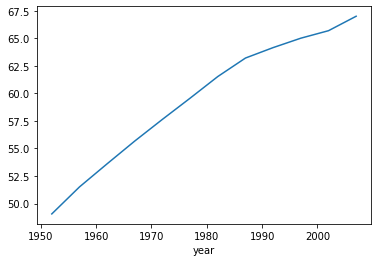

In [38]:
global_yearly_life_expectancy.plot();

## Creating a Series

- The Pandas *Series* is a 1-D container, similar to built-in Python list.
- A DataFrame can be thought of a dictionary of Series objects, where each key is the column name and the value is the Series.
- Each element is Pandas Series should be of same datatype.


In [39]:
s = pd.Series(['apple', 46.45])
s

0    apple
1    46.45
dtype: object

### Assigning index values to Series by passing a Python list,tuple and dictionary

In [40]:
s = pd.Series(['Wes Mckinney', 'Creator of Pandas'],
              index = ['Person','Who'])

s

Person         Wes Mckinney
Who       Creator of Pandas
dtype: object

In [41]:
s = pd.Series(('Wes Mckinney', 'Creator of Pandas'),
              index = ('Person','Who'))

s

Person         Wes Mckinney
Who       Creator of Pandas
dtype: object

## Creating a DataFrame

In [42]:
scientists = pd.DataFrame({
    'Name' : ['Rosaline Franklin','William Gosset'],
    'Occupation' : ['Chemist','Statistician'],
    'Born' : ['1920-07-25','1876-06-13'],
    'Died' : ['1958-04-16','1937-10-16'],
    'Age' : [37, 61]
})

scientists

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


- Columns name are not in an ordered way as Python dictionaries are not ordered.

In [43]:
from collections import OrderedDict

scientists = pd.DataFrame(OrderedDict([
    ('Name' , ['Rosaline Franklin','William Gosset']),
    ('Occupation' , ['Chemist','Statistician']),
    ('Born' , ['1920-07-25','1876-06-13']),
    ('Died' , ['1958-04-16','1937-10-16']),
    ('Age' , [37, 61])
])
)

scientists






,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [44]:
scientists = pd.DataFrame({
    'Occupation' : ['Chemist','Statistician'],
    'Born' : ['1920-07-25','1876-06-13'],
    'Died' : ['1958-04-16','1937-10-16'],
    'Age' : [37, 61]},
    index=['Rosaline Franklin','William Gosset'],
    columns=['Occupation','Born','Died','Age'])

scientists


,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


### Select 1st row by index label

In [45]:
first_row = scientists.loc['William Gosset']
first_row

Occupation    Statistician
Born            1876-06-13
Died            1937-10-16
Age                     61
Name: William Gosset, dtype: object

#### Attributes and methods associated with Series object

In [46]:
first_row.index

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [47]:
first_row.values

array(['Statistician', '1876-06-13', '1937-10-16', 61], dtype=object)

In [48]:
first_row.keys()

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

- **Attributes** can be thought of as properties of an object. Eg : index
- **Methods** can be thought of as some calculations or operation that is performed. Eg: Keys

In [49]:
first_row.keys()[0]

'Occupation'

#### Other attributes of Pandas Series are :

In [50]:
first_row.loc['Occupation']

'Statistician'

In [51]:
first_row.iloc[0]

'Statistician'

In [52]:
first_row.dtype

dtype('O')

In [53]:
first_row.shape

(4,)

In [54]:
first_row.size

4

In [55]:
ages = scientists['Age']
ages

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

- Numpy is a scientific computing library that typically deals with numeric vectors.

#### Some methods of Series are :

In [56]:
ages.mean()

49.0

In [57]:
ages.min()

37

In [58]:
ages.max()

61

In [59]:
ages.std()

16.97056274847714

In [60]:
second_row = scientists.loc['Rosaline Franklin']
second_row

Occupation       Chemist
Born          1920-07-25
Died          1958-04-16
Age                   37
Name: Rosaline Franklin, dtype: object

In [61]:
first_row.append(second_row)

Occupation    Statistician
Born            1876-06-13
Died            1937-10-16
Age                     61
Occupation         Chemist
Born            1920-07-25
Died            1958-04-16
Age                     37
dtype: object

#### Converting Series to DataFrame

In [62]:
first_row.to_frame()

,William Gosset
Occupation,Statistician
Born,1876-06-13
Died,1937-10-16
Age,61


In [63]:
scientists = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/scientists.csv")
scientists.head()

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist


In [64]:
ages = scientists['Age']
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [65]:
ages.describe()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [66]:
ages[ages > ages.mean()]

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

## Broadcasting

- Broadcasting refers to how operations are calculated between arrays with different shapes.

In [67]:
ages + 100

0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64

In [68]:
ages * 2

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [69]:
ages + pd.Series([1,100])

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

- If we do same calculation with numpy, it will throw an error.

In [70]:
rev_ages = ages.sort_index(ascending=False)
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [71]:
ages + rev_ages

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

- In the above case index labels of vector are aligned automatically, then addition happens.

## DataFrame

In [72]:
scientists[scientists['Age'] > scientists['Age'].mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [73]:
scientists['Born'].dtype

dtype('O')



```
`# This is formatted as code`
```

#### Format the 'Born' and 'Died' column as a datetime

In [74]:
born_datetime = pd.to_datetime(scientists['Born'], format='%Y-%m-%d')
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [75]:
died_datetime = pd.to_datetime(scientists['Died'], format='%Y-%m-%d')
died_datetime

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]

#### To add a column to existing DataFrame

In [76]:
scientists['born_dt'], scientists['died_dt'] = (born_datetime, died_datetime)
scientists

,Name,Born,Died,Age,Occupation,born_dt,died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23


### How to shuffle the values?

In [77]:
import random

random.seed(42)
random.shuffle(scientists['Age'])

scientists['Age']

/usr/lib/python3.7/random.py:278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


0    66
1    56
2    41
3    77
4    90
5    45
6    37
7    61
Name: Age, dtype: int64

In [78]:
scientists

,Name,Born,Died,Age,Occupation,born_dt,died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,66,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,56,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,41,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,77,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,90,Biologist,1907-05-27,1964-04-14
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16
6,Alan Turing,1912-06-23,1954-06-07,37,Computer Scientist,1912-06-23,1954-06-07
7,Johann Gauss,1777-04-30,1855-02-23,61,Mathematician,1777-04-30,1855-02-23


In [79]:
scientists['age_calculation'] = (scientists['died_dt'] - scientists['born_dt'])
scientists

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_calculation
0,Rosaline Franklin,1920-07-25,1958-04-16,66,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,56,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,41,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,77,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,90,Biologist,1907-05-27,1964-04-14,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days
6,Alan Turing,1912-06-23,1954-06-07,37,Computer Scientist,1912-06-23,1954-06-07,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,61,Mathematician,1777-04-30,1855-02-23,28422 days


In [80]:
scientists['age_calculation'] = scientists['age_calculation'].astype('timedelta64[Y]')
scientists

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_calculation
0,Rosaline Franklin,1920-07-25,1958-04-16,66,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,56,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,41,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,77,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,90,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,37,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,61,Mathematician,1777-04-30,1855-02-23,77.0


## Dropping Values

In [81]:
scientists_dropped = scientists.drop(['Age'], axis=1)

In [82]:
scientists_dropped

,Name,Born,Died,Occupation,born_dt,died_dt,age_calculation
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,77.0


## Exporting the data using Pickle

In [84]:
scientists.to_pickle('/content/drive/MyDrive/Colab Notebooks/scientists_df.pickle')

## Reading Pickle data

In [85]:
scientists_df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/scientists_df.pickle')
scientists_df.head()


,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_calculation
0,Rosaline Franklin,1920-07-25,1958-04-16,66,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,56,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,41,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,77,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,90,Biologist,1907-05-27,1964-04-14,56.0


- Pickle files are saved with an extension of .p, .pkl, .pickle
- Pickle is a Python's way of serializing and saving data in a binary format .

## CSV

- Comma seperated values (CSV) are the most flexible data storage type with a delimiter as comma.
- Other delimiters are tab (TSV files)


#### Why CSV's are a preferred data format when collaborating and sharing data ?

- Becuase any program can open this kind of data structure. It can even be opened in a text editor.

In [90]:
### Saving into a TSV file.

scientists.to_csv('/content/drive/MyDrive/Colab Notebooks/scientists_df.tsv', sep='\t', index=False)

In [91]:
scientists_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/scientists_df.tsv', sep='\t')
scientists_df.head()

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_calculation
0,Rosaline Franklin,1920-07-25,1958-04-16,66,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,56,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,41,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,77,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,90,Biologist,1907-05-27,1964-04-14,56.0


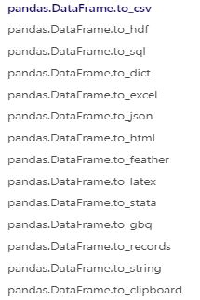

In [98]:
path = "/content/drive/MyDrive/Colab Notebooks/df_export_methods.JPG"

import tensorflow as tf

tf.keras.utils.load_img(
    path, grayscale=False, color_mode='rgb', target_size=(300,200),
    interpolation='nearest'
)